# Plot

In [1]:
import warnings
warnings.filterwarnings("ignore", message="numpy.dtype size changed")
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import LogNorm

delphesDir = os.path.abspath("./MG5/Delphes")
os.environ['ROOT_INCLUDE_PATH'] = os.path.join(delphesDir,"external")

import ROOT

ROOT.gSystem.Load(os.path.join(delphesDir,"libDelphes.so"))

ROOT.gInterpreter.Declare('#include "classes/SortableObject.h"')
ROOT.gInterpreter.Declare('#include "classes/DelphesClasses.h"')
ROOT.gInterpreter.Declare('#include "external/ExRootAnalysis/ExRootTreeReader.h"')

from helper import getAlpha,getIP2D,getSigmaD0,getTheta2D,getJetTracks

plt.style.use('fivethirtyeight') #Set style
plt.rcParams.update({'figure.figsize' : (15,10)})  #Set general plotting options
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "sans-serif",
    "font.sans-serif": ["Helvetica"]})

plt.rcParams.update({"savefig.dpi" : 300}) #Figure resolution


#Define plotting style:
sns.set_style('ticks',{'font.family':'Times New Roman', 'font.serif':'Times New Roman'})
sns.set_context('paper', font_scale=1.8)
cm = plt.colormaps['RdYlBu']

colors = sns.color_palette('Paired')

Welcome to JupyROOT 6.30/06


### Load Recast Data

In [2]:
inputFile = 'pp2ZH/Events/run_01/ctau_1mm_delphes_events.root'

In [3]:
IP2D = []
theta2D = []
alpha = []
pT = []
weights = []
ntotal = 0
lumi = 1.0
totalweightPB = 0.0
ntotal = 0


f = ROOT.TFile(inputFile,'read')
tree = f.Get("Delphes")
nevts = tree.GetEntries()
nevts = 5000

for ievt in range(nevts):
    tree.GetEntry(ievt)   
    weightPB = tree.Event.At(0).Weight/nevts
    jets = tree.Jet
    tracks = tree.Track        

    for j in jets:
        if j.PT < 35.0:
            continue
        if abs(j.Eta) > 2.4:
            continue
        jet_tracks = getJetTracks(j,tracks)
        if len(jet_tracks) == 0:
            continue
        pT.append(j.PT)
        alpha.append(getAlpha(jet_tracks))
        IP2D.append(getIP2D(jet_tracks))
        theta2D.append(getTheta2D(jet_tracks))
        weights.append(weightPB)
f.Close()

            

/home/lessa/exoHiggsEJ/helper.py:152: RuntimeWarning: divide by zero encountered in log10
  ltheta = np.log10(theta)


### Plot Distributions

In [4]:
cmsIP2D = np.genfromtxt('./CMS_data/HEPData-ins1954276-v1-Figure_002-a.csv',skip_footer=99,skip_header=43,delimiter=',')
bins = cmsIP2D[:-1,0]-np.diff(cmsIP2D[:,0])/2

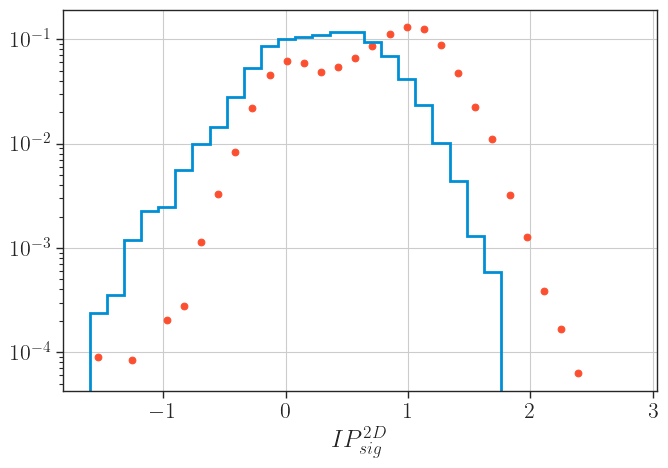

In [5]:
colors = sns.color_palette('deep')
fig = plt.figure(figsize=(7,5))
h1,_,_ = plt.hist(IP2D,histtype='step',linewidth=2,bins=bins,density=False,weights=[1.0/len(IP2D)]*len(IP2D))
plt.scatter(cmsIP2D[:,0],cmsIP2D[:,1])

# plt.legend()
plt.yscale('log')
# plt.ylim(1e-2,10)
# plt.xlim(-1.5,3.0)
plt.grid()

plt.xlabel(r'$IP_{sig}^{2D}$',fontsize=18)
# plt.ylabel('Normalized events')

# plt.title(r'$m_T = %1.0f$ GeV, $m_{\chi} = %1.0f$ GeV, $y_{DM} = %1.0f$' %(mST,mChi,yDM),loc='left')
plt.tight_layout()
plt.show()

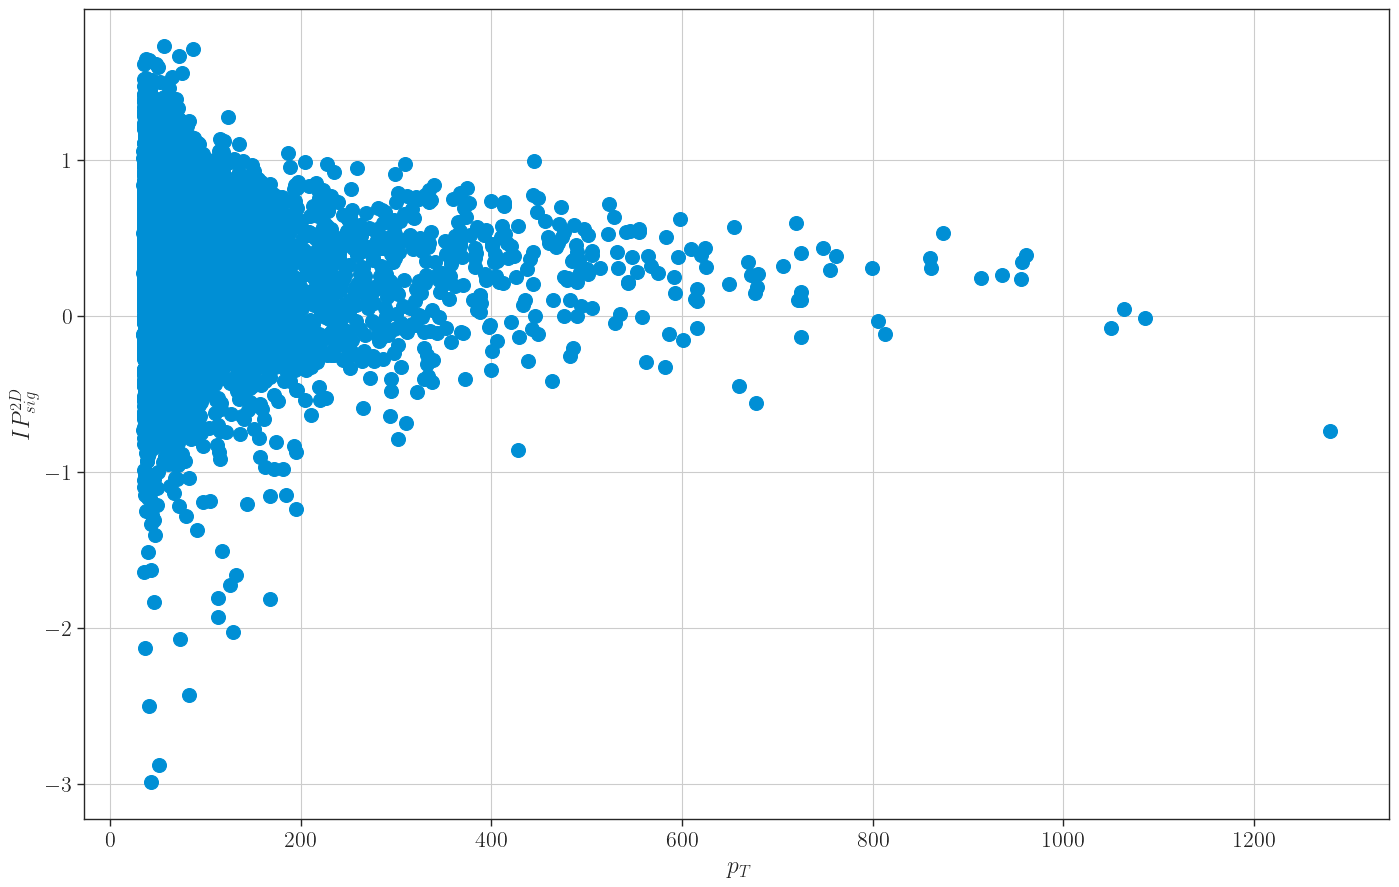

In [6]:
plt.scatter(pT,IP2D,s=100)
plt.xlabel(r'$p_T$')
plt.ylabel(r'$IP_{sig}^{2D}$')
# plt.ylim(-3,-0.5)
plt.grid()
# plt.xticks(np.arange(0.,500.,50.))
# plt.xlim(0.,300.)
plt.show()

In [7]:
cmsTheta2D = np.genfromtxt('./CMS_data/HEPData-ins1954276-v1-Figure_002-b.csv',skip_footer=78,skip_header=36,delimiter=',')
bins = cmsTheta2D[:-1,0]-np.diff(cmsTheta2D[:,0])/2

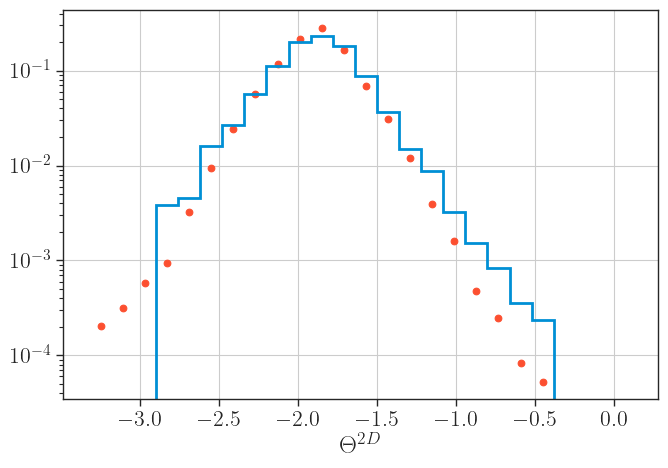

In [8]:
colors = sns.color_palette('deep')
fig = plt.figure(figsize=(7,5))
h1,_,_ = plt.hist(theta2D,histtype='step',linewidth=2,bins=bins,density=False,weights=[1.0/len(theta2D)]*len(theta2D))

plt.scatter(cmsTheta2D[:,0],cmsTheta2D[:,1])
plt.yscale('log')
plt.grid()

plt.xlabel(r'$\Theta^{2D}$',fontsize=18)
plt.tight_layout()
plt.show()

In [9]:
cmsAlpha = np.genfromtxt('./CMS_data/HEPData-ins1954276-v1-Figure_002-c.csv',skip_footer=153,skip_header=60,delimiter=',')
bins = cmsAlpha[:-1,0]-np.diff(cmsAlpha[:,0])/2
bins[0] = 0.0
bins = np.append(bins,cmsAlpha[-1,0]-np.diff(cmsAlpha[-2:,0])/2)
bins = np.append(bins,cmsAlpha[-1,0]+np.diff(cmsAlpha[-2:,0])/2)

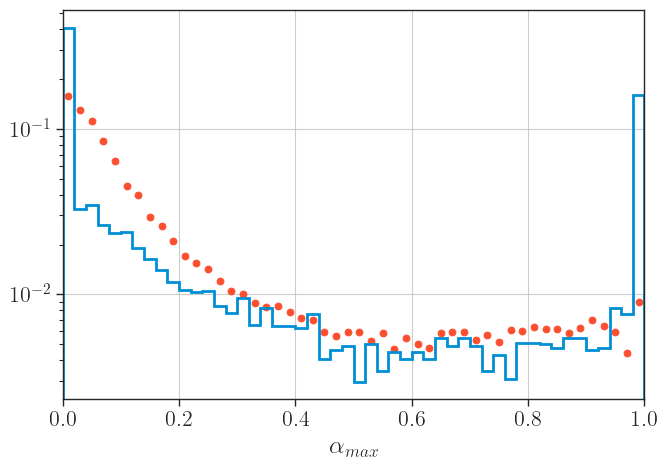

In [10]:
colors = sns.color_palette('deep')
fig = plt.figure(figsize=(7,5))
h1,_,_ = plt.hist(alpha,histtype='step',linewidth=2,bins=bins,density=False,weights=[1.0/len(alpha)]*len(alpha))
plt.scatter(cmsAlpha[:,0],cmsAlpha[:,1])
# plt.legend()
plt.yscale('log')
# plt.ylim(1e-3,1e0)
plt.xlim(0.,1.)
plt.grid()

plt.xlabel(r'$\alpha_{max}$',fontsize=18)
# plt.ylabel('Normalized events')

# plt.title(r'$m_T = %1.0f$ GeV, $m_{\chi} = %1.0f$ GeV, $y_{DM} = %1.0f$' %(mST,mChi,yDM),loc='left')
plt.tight_layout()
plt.show()